In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from AlgoTestFactory import *

# altf1 = AlgoTestFactory([0, 10000], 15, savePath="Combined_4_test2", storeAccuracies=True)

# altf1.run()

In [3]:
from SktWsegRWR_utf8 import *
import pickle
import ProbData
from ProbModels import *
import multiprocessing
import math
import json
import pprint
import csv
from utilities import *
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
%matplotlib inline

Dataloader Started[Prob]...
Dataloader Finished[Prob]...
Preprocessing PCRW Database...
Preprocessing PCRW Database [COMPLETE]...


In [8]:
loaded_SKT = pickle.load(open('../Simultaneous_CompatSKT_10K.p', 'rb'))
loaded_DCS = pickle.load(open('../Simultaneous_DCS_10K.p', 'rb'))

In [5]:
undone = list(pickle.load(open('.temp/undone13K.p', 'rb')))

In [5]:
pb = ProbModels(fullCo_oc_mat = ProbData.fullCo_oc_mat, unigram_counts = ProbData.unigram_counts,
               cng2cngFullMat = ProbData.cng2cngFullMat, cng2index_dict = ProbData.cng2index_dict,
               w2w_samecng_fullmat=ProbData.w2w_samecng_fullmat, samecng_unigram_counts=ProbData.samecng_unigram_counts,
               v2c_fullMat = ProbData.v2c_fullMat)

algo = SktWsegRWR(
            w2w_modelFunc = pb.get_w2w_mat, 
            t2t_modelFunc = pb.get_cng2cng_mat,
            v2c_modelFunc = pb.get_v2c_ranking,
            df_PCRW = ProbData.df_pcrw,
            sameCng_modelFunc = pb.get_w2w_samecng_mat,
            partition=[0.25, 0.25, 0.25, 0.1]
        )

In [19]:
def debugSentences(fs, partition, algoname):
    
    np.set_printoptions(precision=4)
    # for f in list(goodFileDict.keys())[1:20]:
    # for f in list(goodFileDict.keys())[1:100]:
    for f in fs:
    #     print('=='*20)
        sentenceObj = loaded_SKT[f]
        dcsObj = loaded_DCS[f]
        solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
        solution_no_pvb = [removePrefix(l) for l in solution]
#         print('='*40)
#         print(dcsObj.lemmas)
#         print(solution)

#         SeeSentence(sentenceObj)
        if(sentenceObj != None):
            algo.partition = np.array(partition)
            result = algo.predict(sentenceObj, dcsObj, algoname = algoname)
            if(result != None):
                solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
                ac = Accuracy(result, dcsObj)
                print(f, "\t", ac)
#                 display(detail['sentence'])
#                 display(detail['nodeList'])
#                 display(detail['DCSLemmas'])
                
#                 display(result)
#                 print(detail['nodeList'])
#                 print('Initial Query:', detail['initialQuery'])
#                 for step in range(detail['steps']):
#                     print('-'*30)
#                     print('Step:', step)
#                     print('-'*30)
#                     print('Winner:', detail[str(step)]['winner'])
#                     print('Removed:', detail[str(step)]['removed'])
#                     print('Query:', detail[str(step)]['updated_query'])
#                     print(detail[str(step)]['w2w_samecng_score'])
        

# fs = ['18269.p2', '421943.p2', '421943.p2']
fs = list(loaded_SKT.keys())[850:860]
# fs = undone
# print(fs)
# debugSentences(fs, [0.35, 0.1, 0.55], algoname = '3RWR')
debugSentences(fs, [0.35, 0.1, 0.55], algoname = '25Path')

6013.p2 	 100.0
291475.p2 	 57.142857142857146
320448.p2 	 85.71428571428571
195941.p2 	 100.0
90075.p2 	 85.71428571428571
1506.p2 	 57.142857142857146
1632.p2 	 50.0
205698.p2 	 85.71428571428571
440749.p2 	 42.857142857142854


In [8]:
# goodFileDict = {}
# new_flist = os.listdir('../TextSegmentation/CompatSKT/')
# for f in new_flist:
#     goodFileDict[f] = '../TextSegmentation/CompatSKT/' + f
# pickle.dump(goodFileDict, open('mergedGood_CompatSKT.p', 'wb'))

In [10]:
# df_pf1 = pd.read_csv('extras/pvbnhi@pf.csv', header=None, names=['file', 'miss', 'miss2'])
# df_pf2 = pd.read_csv('extras/pvbnhi@skt.csv', header=None, names=['file', 'miss', 'miss2'])
# df_pf3 = pd.read_csv('extras/pvbnhi@upd.csv', header=None, names=['file', 'miss', 'miss2'])

# df_pf1['miss'] = df_pf1[df_pf1['miss'] != 'Incomplete chunk']['miss'].astype(int)
# df_pf1 = df_pf1[df_pf1['miss'] == 0]
# df_pf1['folder'] = '../TextSegmentation/Pickle_Files/'

# df_pf2['miss'] = df_pf2[df_pf2['miss'] != 'Incomplete chunk']['miss'].astype(int)
# df_pf2 = df_pf2[df_pf2['miss'] == 0]
# df_pf2['folder'] = '../TextSegmentation/corrected_10to20/'

# df_pf3['miss'] = df_pf3[df_pf3['miss'] != 'Incomplete chunk']['miss'].astype(int)
# df_pf3 = df_pf3[df_pf3['miss'] == 0]
# df_pf3['folder'] = '../TextSegmentation/Updated Pickles/'

# frames = [df_pf1, df_pf2, df_pf3]
# df_pf = pd.concat(frames)
# %reset_selective df_pf1
# %reset_selective df_pf2
# %reset_selective df_pf3
# goodFileDict = {}
# for index, row in df_pf.iterrows():
#     goodFileDict['%d.p' % row['file']] = '%s%d.p' % (row['folder'], row['file'])
len(goodFileDict)

100078

49441

In [66]:
algo.partition = np.array([0.33,0.33,0.33,0.01])

In [67]:
fs = ['31031.p2']
np.set_printoptions(precision=4)
# for f in list(goodFileDict.keys())[1:20]:
# for f in list(goodFileDict.keys())[1:100]:
for f in fs:
#     print('=='*20)
    sentenceObj, dcsObj = loadSentence_nopre(f, goodFileDict[f])
    if(sentenceObj != None):
        result = algo.predict(sentenceObj, dcsObj, verbose = False, supervised=True, eta=0.1)
        if(result != None):
            solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
            ac = Accuracy(result, dcsObj)
            print(f, "\t", ac)

31031.p2 	 66.66666666666667


In [107]:
f = '30240.p'
# print(goodFileDict[f])
s, d = loadSentence(f, '../TextSegmentation/Updated Pickles/30240.p')
SeeSentence(s)
SeeDCS(d)

NameError: name 'loadSentence' is not defined

In [7]:
partitions = [
    
]

['16702.p2']
[0.35, 0.1, 0.55]
16702.p2 	 85.71428571428571
[0.35, 0.1, 0.55]


UnboundLocalError: local variable 'tid' referenced before assignment

In [ ]:
algo.partition = np.array([ 0.25,  0.05,  0.45,   0.25])

# algo.partition = np.random.random(size=(4,))
# algo.partition = np.array(defaultPartition)
algo.partition /= np.sum(algo.partition)

with open('.temp/partition_datas_04_probFixed.csv', 'w') as wcsv_fh:
    wcsv = csv.writer(wcsv_fh)
    for f in list(loaded_SKT.keys())[0:2000]:
    # for f in fullfs:
        sentenceObj = loaded_SKT[f]
        dcsObj = loaded_DCS[f]
        if(sentenceObj != None):
#             if any(algo.partition[:-1:] < 0.05) or any(algo.partition[:-1:] > 0.95):
#                 wcsv.writerow(algo.partition)
# #                 algo.partition = np.random.random(size=(4,))
#                 algo.partition = np.array(defaultPartition)
#                 algo.partition /= np.sum(algo.partition)
            result = algo.predict(sentenceObj, dcsObj, supervised=True, eta = 0.1, weightCollectorCSV = wcsv)
            if(result != None):
                ac = Accuracy(result, dcsObj)
                solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
#                 print(result)
#                 print('vs')
#                 print(solution)

#                 print(f, "\t", ac)

In [10]:
print(algo.partition)
algo.partition/np.sum(algo.partition)

[ 0.32  0.33  0.32  0.  ]


array([ 0.33,  0.34,  0.33,  0.  ])

In [31]:
# fullfs = ['105587.p','293473.p','379245.p']
fullfs = ['302864.p', '292204.p', '161425.p', '128533.p', '265112.p', '16349.p', '320178.p', '334655.p', '331468.p', '365975.p', '434538.p', '148267.p', '340997.p', '204751.p', '289589.p', '423330.p', '276728.p', '105056.p', '325962.p', '383515.p', '60055.p', '228316.p', '192549.p', '169215.p', '393452.p', '433996.p', '440103.p', '68686.p', '157189.p', '440567.p']

In [6]:
fullfs = ['302864.p', '292204.p', '161425.p', '128533.p', '265112.p', '16349.p', '320178.p', '334655.p', '331468.p', '365975.p', '434538.p', '148267.p', '340997.p', '204751.p', '289589.p', '423330.p', '276728.p', '105056.p', '325962.p', '383515.p', '60055.p', '228316.p', '192549.p', '169215.p', '393452.p', '433996.p', '440103.p', '68686.p', '157189.p', '440567.p']
def GetSomeJSON():
    lowScore = []
    midScore = []
    highScore = []
    np.set_printoptions(precision=4)
#     for i in range(1, 400):
#         f = list(goodFileDict.keys())[i]
#     print(len(fullfs))
    for f in fullfs:
        sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
        if(sentenceObj != None):
            result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)

            if(result != None):
                runDetails['file'] = f
                ac = runDetails['accuracy']
#                 print(f, ac)

                # CODE FOR SELECTING FILES 
#                 if(i%100 == 0):
#                     print('Chekpoint:', i)
                if(ac <= 40):
                    lowScore.append(runDetails)
                elif (ac <= 60):
                    if(ac >= 45):
                        midScore.append(runDetails)
                elif (ac <= 100):
                    if(ac >= 80):
                        highScore.append(runDetails)

    print('Lowscore files found:', len(lowScore))
    print('Midscore files found:', len(midScore))
    print('Highscore files found:', len(highScore))

    lowScore = lowScore[0:10]
    midScore = midScore[0:10]
    highScore = highScore[0:10]
    pickle.dump(lowScore, open('lowScore.p', 'wb'))
    pickle.dump(midScore, open('midScore.p', 'wb'))
    pickle.dump(highScore, open('highScore.p', 'wb'))

#=================================================================
GetSomeJSON()

NameError: name 'loadSentence' is not defined

In [5]:
def MacroAccuracy():
    allAcs = []
    np.set_printoptions(precision=4)
    algo.partition = np.array([ 0.05,  0.05,  0.45,   0.45])
    i = 0
    for f in loaded_SKT.keys():
        i += 1
    # for f in fullfs:
        sentenceObj = loaded_SKT[f]
        dcsObj = loaded_DCS[f]
        if(sentenceObj != None):
            result = algo.predict(sentenceObj, dcsObj, verbose = False)
            
            if(result != None):
#                 print(result)
#                 print(dcsObj.lemmas)
                ac = Accuracy(result, dcsObj)
                allAcs.append(ac)
#                 print(f, ac)

                # CODE FOR SELECTING FILES 
                if(i%400 == 0):
                    print('Chekpoint:', i)
#                 if i >= 2000:
#                     break
    allAcs = np.array(allAcs)
    return allAcs


#=================================================================
allAcs = MacroAccuracy()

Chekpoint: 400
Empty name in file 240430
Chekpoint: 1200
Chekpoint: 1600
Chekpoint: 2000
Chekpoint: 2800
Chekpoint: 3200
Chekpoint: 3600
Chekpoint: 4000
Empty name in file 131042
Chekpoint: 4400
Chekpoint: 4800
Empty name in file 431033
Chekpoint: 5200
Empty name in file 32130
Chekpoint: 5600
Chekpoint: 6000
Chekpoint: 6400
Chekpoint: 6800
Empty name in file 190965
Chekpoint: 7200
Chekpoint: 7600
Empty name in file 19229
Chekpoint: 8000
Empty name in file 310144
Empty name in file 156107
Empty name in file 389091
Empty name in file 7302
Chekpoint: 8800
Empty name in file 333881
Chekpoint: 9200
Empty name in file 32452
Chekpoint: 9600
Chekpoint: 10000


Partition: [ 0.15  0.05  0.45  0.45]
8756
76.5010499609
Min: 0.000000, Max: 100.000000


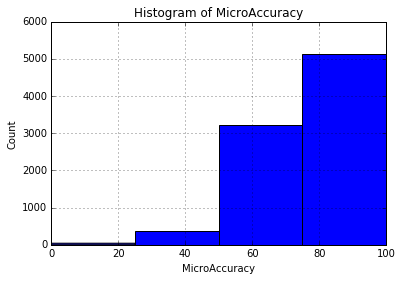

Macro Accuracy %: 18.3645500228


In [6]:
print('Partition:', algo.partition)
print(len(allAcs))
print(np.mean(allAcs))
print('Min: %f, Max: %f' % (np.min(allAcs), np.max(allAcs)))
# the histogram of the data
n, bins, patches = plt.hist(allAcs, 4, normed=False)
plt.xlabel('MicroAccuracy')
plt.ylabel('Count')
plt.title('Histogram of MicroAccuracy')
plt.grid(True)
plt.show()

print('Macro Accuracy %:', 100*np.sum(allAcs >= 95)/allAcs.shape[0])

In [ ]:
K

In [ ]:
def SeeSomeJSON(region = 'mid', files = ['lowScore.p', 'midScore.p', 'highScore.p']):
    np.set_printoptions(precision=3)
    if region == 'low':
        p = pickleFixLoad(files[0])
    elif region == 'mid':
        p = pickleFixLoad(files[1])
    else:
        p = pickleFixLoad(files[2])
#     for pf in p:
#         print(pf['file'])
    n_steps = p[0]['steps']
    for s in range(n_steps):
        
        print('Step:', s)
        print('='*20)
        
        for key, val in p[0][str(s)].items():
            print(key, ":")
            print(val)
            print('-'*20)
        
SeeSomeJSON('low')
print('='*20)
SeeSomeJSON('mid')
print('='*20)
SeeSomeJSON('high')

In [68]:
def ArePredictionsOK():
    with open('.temp/weird.csv', 'w') as fh:
        wcsv = csv.writer(fh)
        wcsv.writerow(['filename', 'sentence', 'solution', 'prediction'])
        np.set_printoptions(precision=4)
        badCount = 0
        for i in range(1, 600):
            f = list(goodFileDict.keys())[i]

            sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
            if(sentenceObj != None):
                result = algo.predict(sentenceObj, dcsObj, verbose = False)
                if(result != None):            
                    solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
                    ac = Accuracy(result, dcsObj)
                    if ac >= 100 and len(result) != len(solution):
                        badCount += 1
                        if(badCount%10 == 0):
                            print("="*40)
                        sline = [f, sentenceObj.sentence, solution, result]
                        wcsv.writerow(sline)
        print(badCount, 'weird predictions encountered.')
        
ArePredictionsOK()

35 weird predictions encountered.


In [9]:
sentenceObj, dcsObj = loadSentence('1.p', '../TextSegmentation/corrected_10to20/1.p')
SeeSentence(sentenceObj)

SKT ANALYZE
---------------
paYca ratnAni muKyAni coparatnacatuzwayam   
Analyzing: paYca
-------------------------
Analyzing: ratnAni
0 : ratnAni [0, 'ratna', 81] [1, 'ratna', 41] 
0 : ratnAni [2, 'ratna', 61] 
-------------------------
Analyzing: muKyAni
0 : muKyAni [3, 'muKya', 81] [4, 'muKya', 41] 
0 : muKyAni [5, 'muKya', 61] 
-------------------------
Analyzing: coparatnacatuzwayam
0 : ca [6, 'ca', 2] 
9 : catuzwayam [7, 'catuzwaya', 31] [8, 'catuzwaya', 69] [9, 'catuzwaya', 71] 
4 : ratna [10, 'ratna', 3] 
1 : uparatna [11, 'uparatna', 3] 
1 : Upa [12, 'vap', -158] 
-------------------------
Analyzing  paYca
0 :  paYca [] []
Analyzing  ratnAni
0 :  ratnAni ['ratna'] [{'noun': ['acc. pl. n.', 'nom. pl. n.']}]
0 :  ratnAni ['ratna'] [{'noun': ['voc. pl. n.']}]
Analyzing  muKyAni
0 :  muKyAni ['muKya'] [{'noun': ['acc. pl. n.', 'nom. pl. n.']}]
0 :  muKyAni ['muKya'] [{'noun': ['voc. pl. n.']}]
Analyzing  coparatnacatuzwayam
0 :  ca ['ca'] [{'indeclinable': ['conj.']}]
9 :  catuzwa

In [8]:
SeeDCS(dcsObj)

DCS ANALYZE
---------------
upacAreRa SIlena rUpayOvanasaMpadA   
[['upacāra'], ['śīla'], ['rūpa', 'yauvana', 'sampad']]
Lemmas: ['upacAra', 'SIla', 'rUpa', 'yOvana', 'sampad']
[['89'], ['91'], ['3', '3', '90']]



In [7]:
def CSVforSupervised():
    np.set_printoptions(precision=4)
    # Clean the csv files
    metPerfFH = open('.temp/metPerfFH.csv', 'w')
    metPerfFH_bin = open('.temp/metPerfFH_bin.csv', 'w')

    metPerfFH.write('w2w,t2t,w2w_samecng,InDCS\n')
    metPerfFH_bin.write('w2w,t2t,w2w_samecng,InDCS\n')

    metPerfFH.close()
    metPerfFH_bin.close()
    ######################
    gfl = list(goodFileDict.keys())
    for i in range(0, 11000):
        f = gfl[i]
        if(i%250 == 0):
            print('Checkpoint:', i)
        sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
        
        if(sentenceObj != None):
            result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)




In [ ]:
np.set_printoptions(precision=6)
jsonBatch = []
for f_ in lowScore[0:10]:
    f = f_[0]
    sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
    if(sentenceObj != None):
        result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)
        runDetails['file'] = f
        jsonBatch.append(runDetails)
pickle.dump(jsonBatch, open('.temp/lowScore.p','wb'))
print('33 % Complete')
#################################################################
jsonBatch = []
for f_ in midScore[0:10]:
    f = f_[0]
    sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
    if(sentenceObj != None):
        result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)
        runDetails['file'] = f
        jsonBatch.append(runDetails)
pickle.dump(jsonBatch, open('.temp/midScore.p','wb'))
print('67 % Complete')
#################################################################
jsonBatch = []
for f_ in highScore[0:10]:
    f = f_[0]
    sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
    if(sentenceObj != None):
        result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)
        runDetails['file'] = f
        jsonBatch.append(runDetails)
print(pprint.pprint(jsonBatch))
pickle.dump(jsonBatch, open('.temp/highScore.p','wb'))
print('100 % Complete')

In [27]:
baseline_SKTs = pickle.load(open('../Simult_baselineSKT.p', 'rb'))

In [47]:
def DownloadBaselineOutput():
    pb = ProbModels(fullCo_oc_mat = ProbData.fullCo_oc_mat, unigram_counts = ProbData.unigram_counts,
                   cng2cngFullMat = ProbData.cng2cngFullMat, cng2index_dict = ProbData.cng2index_dict,
                   w2w_samecng_fullmat=ProbData.w2w_samecng_fullmat, samecng_unigram_counts=ProbData.samecng_unigram_counts,
                   v2c_fullMat = ProbData.v2c_fullMat)

    algo = SktWsegRWR(
                w2w_modelFunc = pb.get_w2w_mat, 
                t2t_modelFunc = pb.get_cng2cng_mat,
                v2c_modelFunc = pb.get_v2c_ranking,
                df_PCRW = ProbData.df_pcrw,
                sameCng_modelFunc = pb.get_w2w_samecng_mat,
                partition=[0.35, 0.1, 0.55, 1]
            )
    
    counter = 0
    no_query = 0
    with open('baseline_outputs_new_25PATH.csv', 'w') as fh:
        bcsv = csv.writer(fh)
        bcsv.writerow(['filename', 'lemma', 'name', 'cng', 'pos', 'source'])
        for f in baseline_SKTs.keys():
            counter += 1
            if counter % 100 == 0:
                print('chekpoint', counter)
#             if counter > 5:
#                 break

            skt = baseline_SKTs[f]
#             SeeSentence(skt)
            if skt != None:
                result, runDetails = algo.predict(skt, None, algoname = '25Path', verbose = True)
                if result == None:
                    no_query += 1
#                     SeeSentence(skt)
                    continue
                (chunkDict, lemmaList, wordList, revMap2Chunk, qu, cngList, verbs, tuplesMain, qc_pairs) = SentencePreprocess(skt)
    #             print(runDetails.keys())
    #             SeeSentence(skt)
    #             display(runDetails['nodeList'])
    #             print('STEPS:', int(runDetails['steps']))
    #             print(eval(runDetails['initialQuery']))
                for qi in eval(runDetails['initialQuery']):
                    cid, pos, tid = revMap2Chunk[int(qi)]
    #                 print([f, lemmaList[qi], wordList[qi], cngList[qi], pos, 'initial_query'])
                    bcsv.writerow([f, lemmaList[qi], wordList[qi], cngList[qi], pos, 'initial_query'])
                for step in range(int(runDetails['steps'])):
                    wt = runDetails[str(step)]['winner']
                    cid, pos, tid = revMap2Chunk[wt[0]]
    #                 print([f, wt[2], wt[1], wt[3], pos, 'winner'])
                    bcsv.writerow([f, wt[2], wt[1], wt[3], pos, 'winner'])
            else:
                no_query += 1

    print('Can\'t form query node in', no_query, 'files')
DownloadBaselineOutput()

Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
chekpoint 100
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
chekpoint 200
Report ROW SUM ZERO CNG2

In [9]:
def GetLogReg_TrainData():
    algo.partition = np.array([ 0.33,  0.33,  0.33,   0.01])    
    counter = 0
    no_query = 0
    with open('logReg_train_full_again.csv', 'w') as fh:
        bcsv = csv.writer(fh)
        bcsv.writerow(['w2w', 't2t', 'scng', 'DCSLemma'])
        for f in loaded_SKT.keys():
            counter += 1
            if counter % 400 == 0:
                print('chekpoint', counter)
#             if counter >= 20:
#                 break

            skt = loaded_SKT[f]
            dcs = loaded_DCS[f]
            if skt != None:
                result, runDetails = algo.predict(skt, dcs, algoname='3RWR', verbose = True)
                if result == None:
                    no_query += 1
#                     SeeSentence(skt)
                    continue
                (chunkDict, lemmaList, wordList, revMap2Chunk, qu, cngList, verbs, tuplesMain, qc_pairs) = SentencePreprocess(skt)
                sol, solNoPvb = GetSolutions(dcs)
#                 print(runDetails.keys())
# #                 SeeSentence(skt)
#                 display(runDetails['DCSLemmas'])
#                 print('STEPS:', int(runDetails['steps']))
#                 print(eval(runDetails['initialQuery']))
                for step in range(int(runDetails['steps'])):
                    stepData = runDetails[str(step)]
#                     print(stepData['final_rank'])
                    for ri in range(np.where(stepData['winner'][0] == stepData['final_rank'])[0][0], len(stepData['final_rank'])):
#                         print(len(stepData['final_rank']))
                        w = stepData['final_rank'][ri]
#                         print(lemmaList[w] in sol,lemmaList[w] in solNoPvb , lemmaList[w])
                        bcsv.writerow([stepData['w2w_score'][0,w], stepData['t2t_score'][0,w], stepData['w2w_samecng_score'][0,w], lemmaList[w] in sol or lemmaList[w] in solNoPvb])
            else:
                no_query += 1

    print('Can\'t form query node in', no_query, 'files')
GetLogReg_TrainData()

Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 0
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Report ROW SUM ZERO SCNG
Empty name in file 431033
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
chekpoint 400
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
chekpoint 800
chekpoint 1200
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
chekpoint 1600
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
Empty name in file 389091
chekpoint 2000
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO W2W 1
Report ROW SUM ZERO SCNG
chekpoint 2400
Report ROW SUM ZERO CNG2CNG
Report ROW SUM ZERO CNG2CNG
Report ROW SUM

KeyboardInterrupt: 